# Project: EDA and Hypothesis testing


In [928]:
# Load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import warnings
import re
from scipy import stats
%matplotlib inline

# Necessary Functions:

In [929]:
def data_size_and_type(df): # shows size and data types
    print("Data Size:")
    print("number of rows:    ",df.shape[0])
    print("number of columns: ",df.shape[1])
    print("\nData Type:")
    print(df.dtypes)

In [930]:
def missing_value(df): # shows the number of missing values if any else shows no missing value
    if sum(df.isnull().sum())>0:
        print("Missing Values:")
        print(df.isnull().sum())
        print("\nMissing Values by Percentage:")
        df1=(df.isnull().sum().apply(lambda x:(x/df.shape[0]*100)))
        df1.plot(kind="bar")
        plt.show()
        print(df1.loc[df1>0.0].apply(lambda x: str(round(x,2))+"%"))
    else:
        print('No missing value found')

In [931]:
def get_columns_with_missing_value(df): # all columns with missing value
    df1=(df.isnull().sum().apply(lambda x:(x/df.shape[0]*100)))
    return df1.loc[df1>0].index.to_list()


In [932]:
def remove_missing_values(df): # remove missing value with mode and mean
    numeric_columns=df[get_columns_with_missing_value(df)].select_dtypes(include =np.number).columns.to_list()
    fill_in_value={i:df[i].mean() if i in numeric_columns else lending_club[i].mode()[0] for i in get_columns_with_missing_value(df)}
    df.fillna(value=fill_in_value, inplace=True)
    print("Missing value removed by filling up object type with most frequent and numerical data with mean")

In [933]:
def number_of_outliers(df):#check outliers for all columns
    threshold = 3
    total_outliers={}
    for j in df.select_dtypes(include=np.number).columns:
        mean=df[j].mean()
        std=df[j].std()
        outlier = []
        for i in df[j]:
            z = abs(i-mean)/std
            if z > threshold:
                outlier.append(i)
        total_outliers[j]=len(outlier)
    return pd.Series(total_outliers)
        

In [934]:
def column_type_categorical_or_continuous(df, data_type, assumed_size): #determines data whether continuous or categrical
    categorical=[]
    continuous=[]
    for i in df.select_dtypes(include=data_type).columns:
        if len(df[i].value_counts())>assumed_size:
            print(i,":continuous")
            print(len(df[i].value_counts()),"\n")
            continuous.append(i)
        else:
            print(i,": categorical")
            print(len(df[i].value_counts()),"\n")
            sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts())
            plt.show()
            categorical.append(i)
    return categorical,continuous

In [935]:
def distribution_plot(df,feature): # display distribution of a feature
    warnings.filterwarnings('ignore')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(df[feature])
    plt.show()

In [936]:
def remove_outlier_based_on_z_value(df,feature):
    upper_limit = df[feature].mean() + 3*df[feature].std()
    lower_limit = df[feature].mean() - 3*df[feature].std()
    df[feature] = np.where(df[feature]>upper_limit,upper_limit,np.where(df[feature]<lower_limit,lower_limit,df[feature]))
    

In [937]:
def remove_outlier_with_median(df,feature):
    upper_limit = df[feature].mean() + 2.9*df[feature].std()
    lower_limit = df[feature].mean() - 2.9*df[feature].std()
    df[feature] = np.where(df[feature]>upper_limit,df[feature].median(),
                           np.where(df[feature]<lower_limit,df[feature].median(),df[feature]))

In [938]:
def remove_outlier_base_on_IQR(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df[feature] = np.where(df[feature]>upper_limit,upper_limit,np.where(df[feature]<lower_limit,lower_limit,df[feature]))
    

In [939]:
def convert_to_int(df,feature): # convert feature to int ie emp_length
    df[feature] = df[feature].map(lambda x: re.sub("[^0-9]", "", x))
    df[feature]=df[feature].astype('int')

In [940]:
def value_of_t_and_p(a,b): # t test
    t2, p2 = stats.ttest_ind(a,b)
    print("t = " + str(t2))
    print("p = " + str(p2))
    return t2,p2

In [941]:
def print_sig(p_value, alpha): # Output hypothesis
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

# EDA Starts here:

In [942]:
#read data
lending_club=pd.read_csv("Data/lending_club_loan_two.csv")

In [943]:
#display data
lending_club.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [944]:
#show data size and type
data_size_and_type(lending_club)

Data Size:
number of rows:     396030
number of columns:  27

Data Type:
loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


# Missing Values:

Missing Values:
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Missing Values by Percentage:


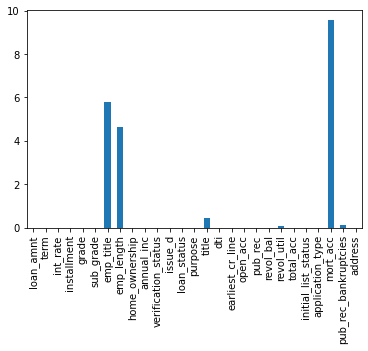

emp_title               5.79%
emp_length              4.62%
title                   0.44%
revol_util              0.07%
mort_acc                9.54%
pub_rec_bankruptcies    0.14%
dtype: object


In [945]:
#show missing values
missing_value(lending_club)

In [946]:
#remove missing values with mean and mode
remove_missing_values(lending_club)

Missing value removed by filling up object type with most frequent and numerical data with mean


In [947]:
# confirming missing value has beeb removed successfully
missing_value(lending_club)

No missing value found


# convert datatype for emp_length:

In [948]:
# Check employment length
lending_club['emp_length'].value_counts()

10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [949]:
# convert emp_length to int64
convert_to_int(lending_club,'emp_length')

In [950]:
# confirming datatype changed for empl_length
lending_club.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# divide numerical fields into categorical and continuous type:


loan_amnt :continuous
1397 

int_rate :continuous
566 

installment :continuous
55706 

emp_length : categorical
10 



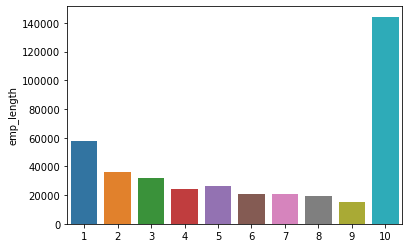

annual_inc :continuous
27197 

dti :continuous
4262 

open_acc : categorical
61 



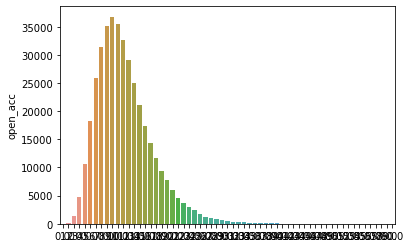

pub_rec : categorical
20 



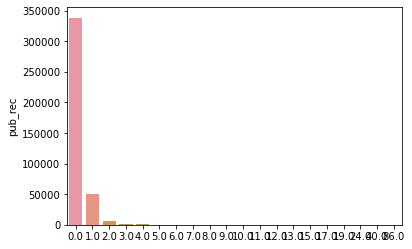

revol_bal :continuous
55622 

revol_util :continuous
1227 

total_acc : categorical
118 



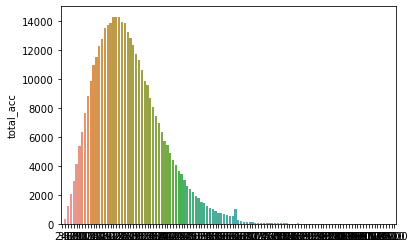

mort_acc : categorical
34 



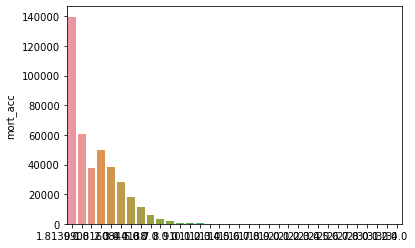

pub_rec_bankruptcies : categorical
10 



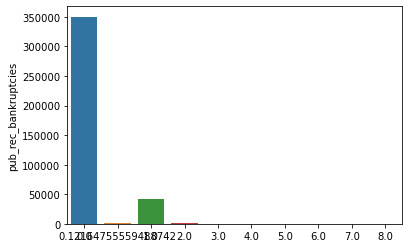

In [951]:
catagorical_numerical,continuous_numerical= column_type_categorical_or_continuous(lending_club,np.number,200)

In [952]:
#print categorical numerical 
catagorical_numerical

['emp_length',
 'open_acc',
 'pub_rec',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [953]:
#print continuous numerical
continuous_numerical

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'revol_util']

# Outliers:

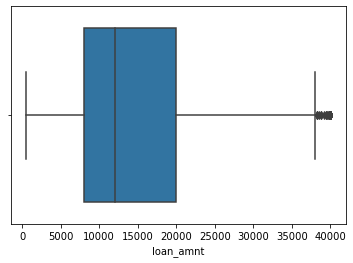

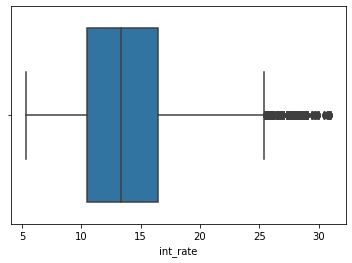

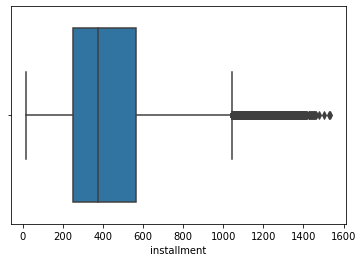

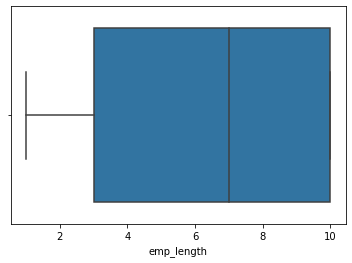

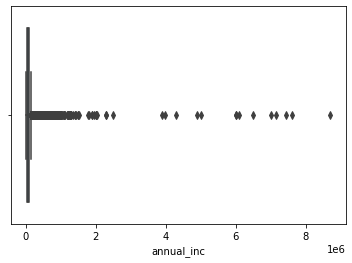

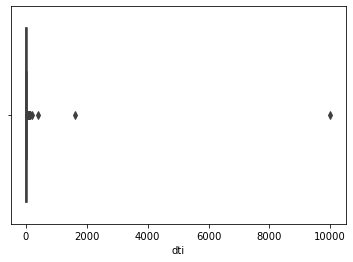

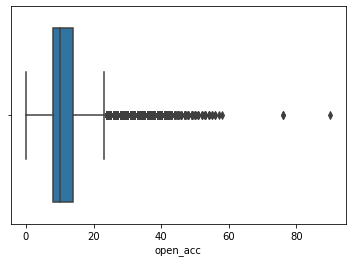

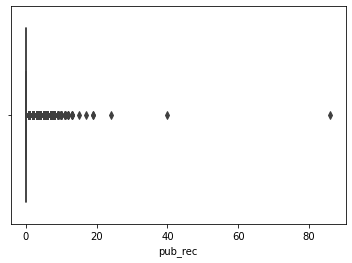

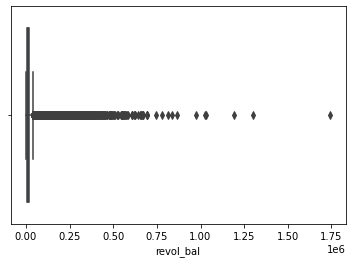

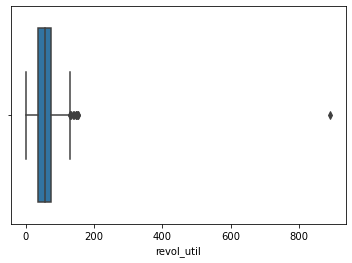

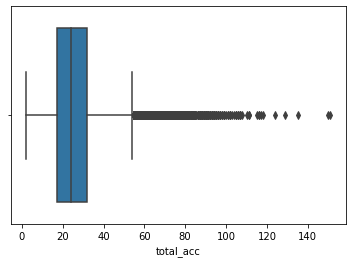

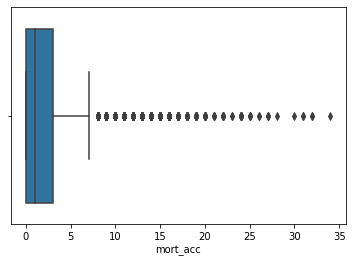

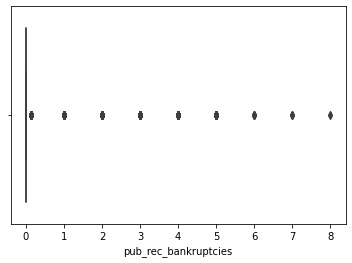

In [954]:
# boxplot to check outliers for all columns
for i in number_of_outliers(lending_club).index:
    sns.boxplot(lending_club[i], labels=[i])
    plt.show()

In [955]:
#show number of outliers in all columns
number_of_outliers(lending_club)

loan_amnt                185
int_rate                 756
installment             5050
emp_length                 0
annual_inc              3197
dti                       12
open_acc                4879
pub_rec                 8019
revol_bal               4790
revol_util                16
total_acc               3401
mort_acc                6843
pub_rec_bankruptcies    2325
dtype: int64

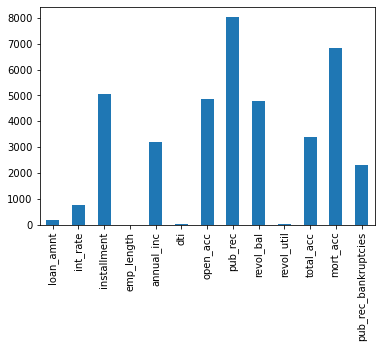

In [956]:
# show number of outliers by histogram
number_of_outliers(lending_club).plot(kind="bar")

In [957]:
#show number of outliers in catagorical_numerical columns 
number_of_outliers(lending_club[catagorical_numerical])

emp_length                 0
open_acc                4879
pub_rec                 8019
total_acc               3401
mort_acc                6843
pub_rec_bankruptcies    2325
dtype: int64

In [958]:
#show number of outliers in continuous_numerical columns 
number_of_outliers(lending_club[continuous_numerical])

loan_amnt       185
int_rate        756
installment    5050
annual_inc     3197
dti              12
revol_bal      4790
revol_util       16
dtype: int64

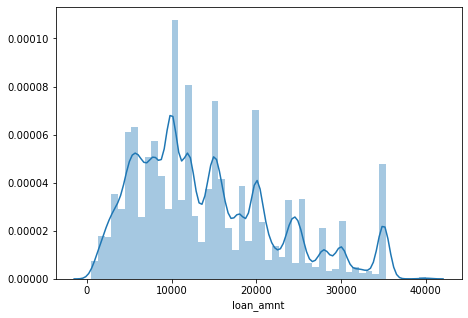

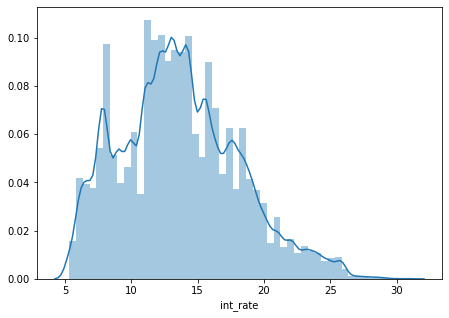

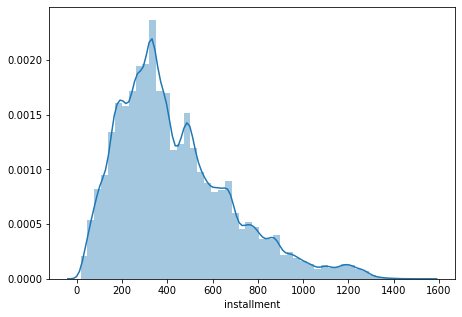

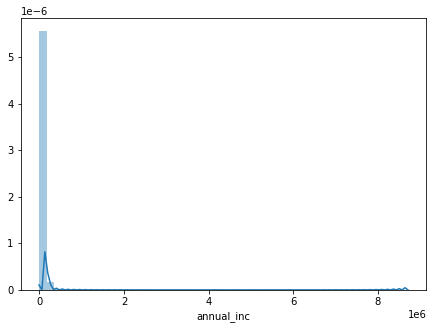

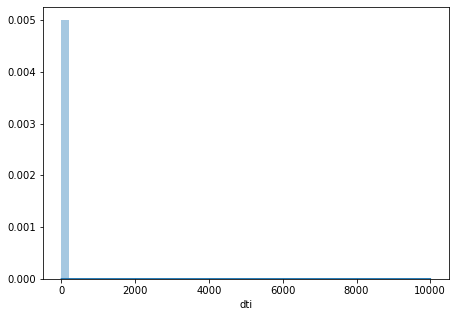

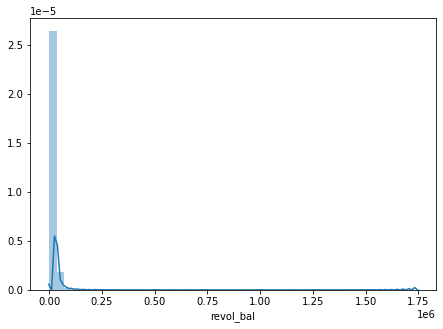

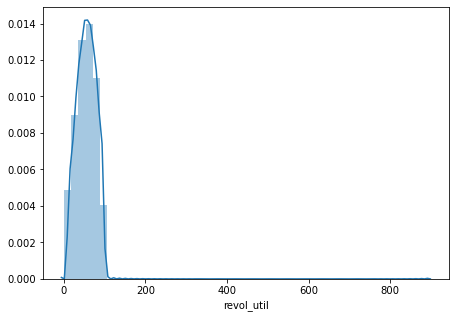

In [959]:
#show distribution of continuous_numerical columns
for i in continuous_numerical:
    distribution_plot(lending_club,i)

In [960]:
#remove outliers based on IQR
for i in continuous_numerical:
    remove_outlier_base_on_IQR(lending_club,i)

In [961]:
#check outliers after removing
number_of_outliers(lending_club[continuous_numerical])

loan_amnt       0
int_rate        0
installment     0
annual_inc      0
dti             0
revol_bal       0
revol_util     16
dtype: int64

In [962]:
#further remove outliers with median base on z value to get rid of outliers in revol_util
remove_outlier_with_median(lending_club,'revol_util')

In [963]:
# confirming no outlier
number_of_outliers(lending_club[continuous_numerical])

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
revol_bal      0
revol_util     0
dtype: int64

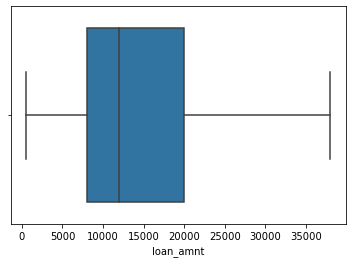

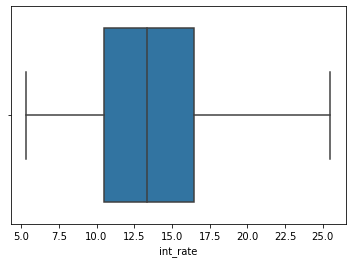

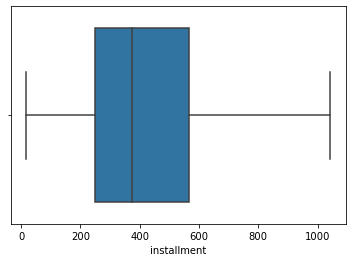

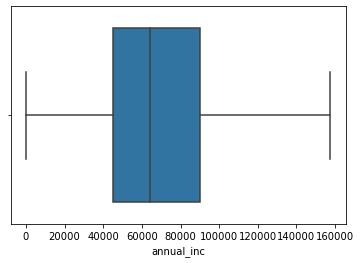

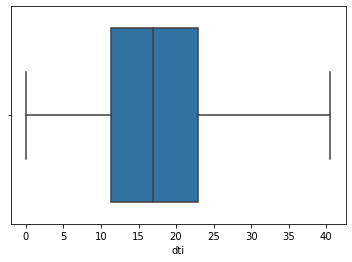

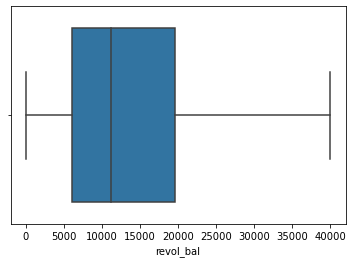

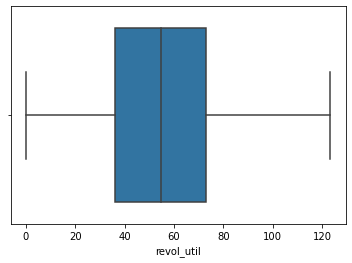

In [964]:
#further check of outliers with boxplot
for i in number_of_outliers(lending_club).index:
    if i in continuous_numerical:
        sns.boxplot(lending_club[i], labels=[i])
        plt.show()

# Correlation:
Find correlation between loan amount and other features.

In [965]:
# Move a column "loan_amnt" to the right for better visualisation 

lending_club=lending_club[[col for col in lending_club.columns if col not in ['loan_amnt']] + ['loan_amnt']]
lending_club.head(5)


,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_amnt
0,36 months,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10000.0
1,36 months,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",8000.0
2,36 months,10.49,506.97,B,B3,Statistician,1,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",15600.0
3,36 months,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",7200.0
4,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",24375.0


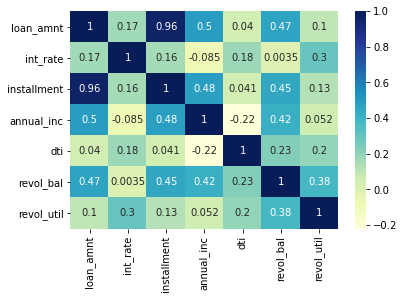

In [966]:
sns.heatmap(lending_club[continuous_numerical].corr(), cmap="YlGnBu", annot=True)

In [967]:
# initial screening: how features relates to loan amount

lending_club[continuous_numerical].corr()[['loan_amnt']]

,loan_amnt
loan_amnt,1.000000
int_rate,0.168572
installment,0.958065
annual_inc,0.498110
dti,0.040164
revol_bal,0.467407
revol_util,0.100227


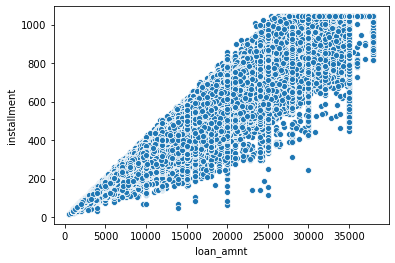

In [968]:
sns.scatterplot(data=lending_club, x="loan_amnt", y="installment")

# Hypothesis Testing:

# Test1:

Null Hypothesis (H0): there is no difference in loan amount between high and low income borrowers

Alternative Hypothesis (HA):  there is a difference in loan amount between high and low income borrowers

<function matplotlib.pyplot.show(*args, **kw)>

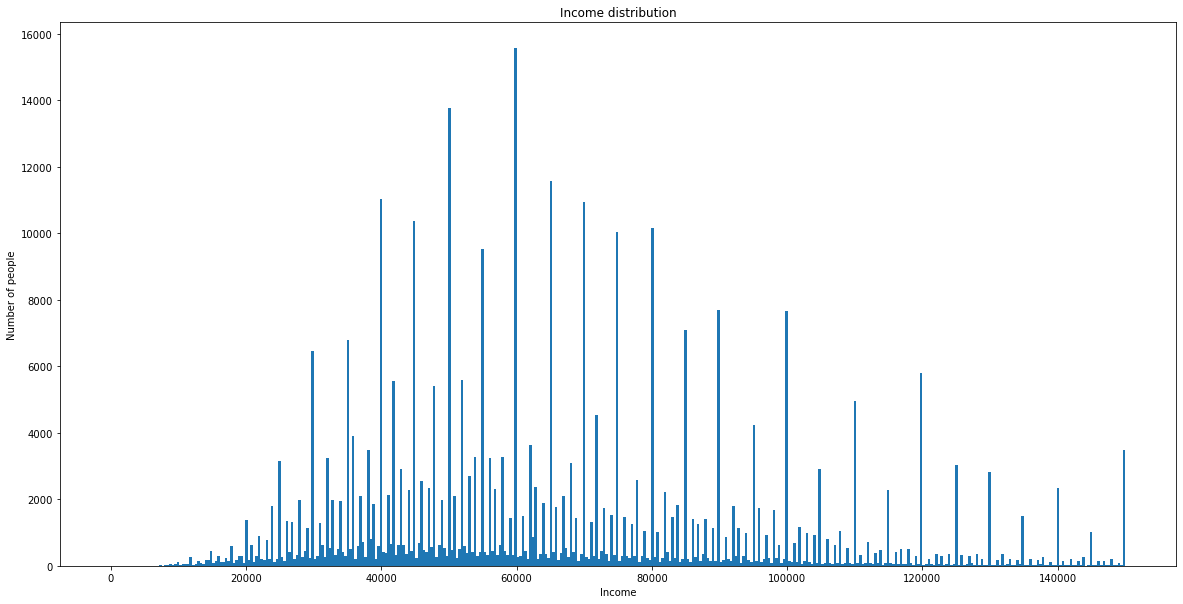

In [969]:
lending_club['annual_inc'].plot.hist( figsize=(20, 10), bins=400,range=(20, 150000))
plt.xlabel("Income")
plt.ylabel("Number of people")
plt.title("Income distribution")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

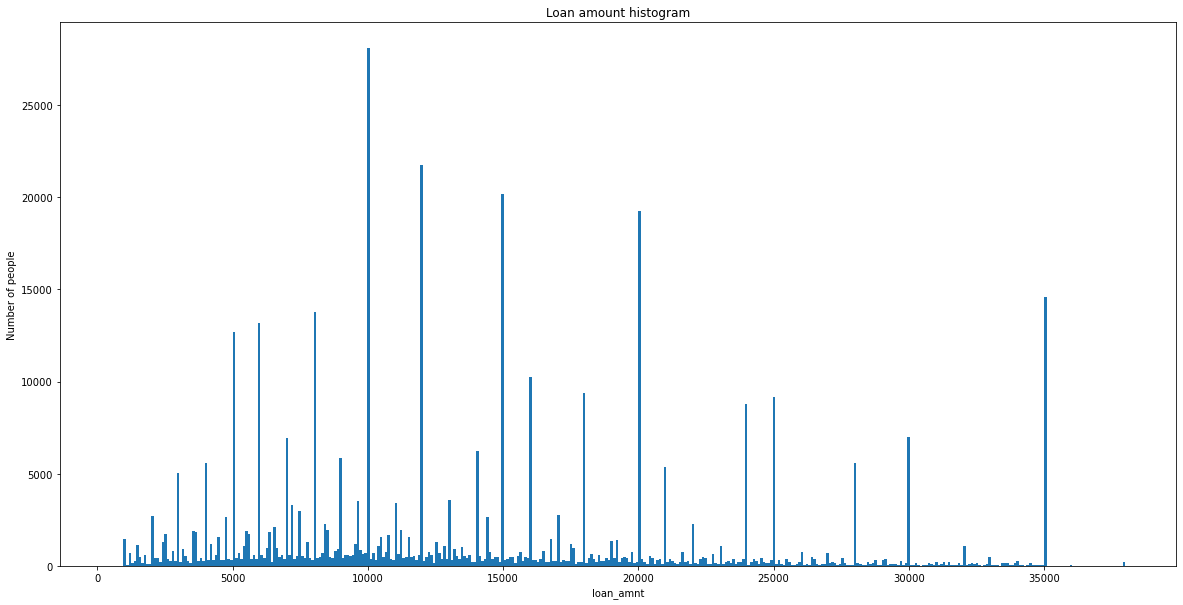

In [970]:
lending_club['loan_amnt'].plot.hist( figsize=(20, 10), bins=400)
plt.xlabel("loan_amnt")
plt.ylabel("Number of people")
plt.title("Loan amount histogram")
plt.show

In [971]:
lending_club["loan_amnt"] = np.where(lending_club["loan_amnt"] >= 15000, 1, 0)

In [972]:
lending_club["loan_amnt"]

0         0
1         0
2         1
3         0
4         1
         ..
396025    0
396026    1
396027    0
396028    1
396029    0
Name: loan_amnt, Length: 396030, dtype: int64

In [973]:
income_high = lending_club[lending_club['annual_inc'] >= 80000].sample(100, random_state=42)
income_low = lending_club[lending_club['annual_inc'] < 80000].sample(100, random_state=42)
alpha=0.05
a = income_high['loan_amnt']
b = income_low['loan_amnt']

In [974]:
t2,p2=value_of_t_and_p(a,b)

t = 5.021847007667701
p = 1.1386646424090583e-06


In [975]:
print_sig(p2, alpha)

We reject our null hypothesis.


# Test2:

Null Hypothesis (H0): there is no difference in loan amount between borrowers with long and short employment length

Alternative Hypothesis (HA): there is a difference in loan amount between borrowers with long and short employment length

In [976]:
emp_long = lending_club[lending_club['emp_length'] >= 3].sample(100, random_state=42)
emp_short = lending_club[lending_club['emp_length'] < 3].sample(100, random_state=42)
alpha=0.05
a = emp_long['loan_amnt']
b = emp_short['loan_amnt']

In [977]:
t2,p2=value_of_t_and_p(a,b)

t = -0.9914528346846639
p = 0.32267457483522743


In [978]:
print_sig(p2, alpha)

We fail to reject our null hypothesis.


# Test3 and Test4:

Null Hypothesis (H0): there is no difference in loan amount between borrowers with the number of open accounts

Alternative Hypothesis (HA): there is a difference in loan amount between borrowers with the number of open accounts

In [979]:
def hypothesis_based_on_number_of_account(number_of_open_acc):
    acc_many = lending_club[lending_club['open_acc'] >= number_of_open_acc].sample(100, random_state=42)
    acc_few = lending_club[lending_club['open_acc'] < number_of_open_acc].sample(100, random_state=42)
    alpha=0.05
    a = acc_many['loan_amnt']
    b = acc_few['loan_amnt']
    t2,p2=value_of_t_and_p(a,b)
    print_sig(p2, alpha)

In [980]:
hypothesis_based_on_number_of_account(3)

t = 5.188327927264088
p = 5.231544942442375e-07
We reject our null hypothesis.


In [981]:
hypothesis_based_on_number_of_account(10)

t = 0.8671209455302155
p = 0.38692537781525393
We fail to reject our null hypothesis.
